In [27]:
!pip install scikit-learn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------- ----------------------------- 30.7/160.8 kB 435.7 kB/s eta 0:00:01
     -------------------------- ----------- 112.6/160.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 1.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 6.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.6 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/7.6 MB 6.1 MB/s eta 0:00:02
   -------- -----------------------

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

In [5]:
df_train=pd.read_csv('train_machinelearning_features.csv')
df_val=pd.read_csv('validation_machinelearning_features.csv')

In [6]:
# Assuming 'binary_labels' is the column containing binary labels
class_distribution = df_train['binary_labels'].value_counts()

print(class_distribution)

binary_labels
0    100783
1     11484
Name: count, dtype: int64


In [7]:
from sklearn.utils import resample

# Function to perform downsampling
def downsample(df):
    minority_class = 1
    majority_class = 0

    # Separate the majority and minority classes
    minority_data = df[df['binary_labels'] == minority_class]
    majority_data = df[df['binary_labels'] == majority_class]

    # Downsample the majority class to match the minority class
    downsampled_majority = resample(majority_data, replace=False, n_samples=len(minority_data), random_state=42)

    # Combine the downsampled majority class with the minority class
    downsampled_df = pd.concat([downsampled_majority, minority_data])

    # Sort the DataFrame to maintain the original order
    downsampled_df.sort_index(inplace=True)


    return downsampled_df

# Apply downsampling to train_df and val_df
downsampled_train_df = downsample(df_train)
downsampled_val_df = downsample(df_val)

# Check the class distribution in the downsampled DataFrames
class_distribution_train = downsampled_train_df['binary_labels'].value_counts()
class_distribution_val = downsampled_val_df['binary_labels'].value_counts()

print("Train Data - Class Distribution:")
print(class_distribution_train)

print("\nValidation Data - Class Distribution:")
print(class_distribution_val)


Train Data - Class Distribution:
binary_labels
1    11484
0    11484
Name: count, dtype: int64

Validation Data - Class Distribution:
binary_labels
1    536
0    536
Name: count, dtype: int64


In [8]:
###############  Create y, y inputs for ML ########################

In [9]:
# Separate features (X) and labels (y) for training set
X_train = downsampled_train_df.drop(columns=['binary_labels'])
y_train = downsampled_train_df['binary_labels']

# Separate features (X) and labels (y) for validation set
X_val = df_val.drop(columns=['binary_labels'])
y_val = df_val['binary_labels']

# Save X and y into separate CSV files for training set
X_train.to_csv('X_down_train.csv', index=False)
y_train.to_csv('y_down_train.csv', index=False, header=['binary_labels'])  # Saving only the 'binary_labels' column

# Save X and y into separate CSV files for validation set
X_val.to_csv('X_down_val.csv', index=False)
y_val.to_csv('y_down_val.csv', index=False, header=['binary_labels'])  # Saving only the 'binary_labels' column


In [53]:
# Separate features (X) and labels (y) for validation set
X_val = df_val.drop(columns=['binary_labels'])
y_val = df_val['binary_labels']
# Save X and y into separate CSV files for validation set
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False, header=['binary_labels'])  # Saving only the 'binary_labels' column

In [10]:
test=pd.read_csv('test_machinelearning_features.csv')

In [12]:
# Assuming 'binary_labels' is the column containing binary labels

# Separate features (X) and labels (y) for test set
X_test = test.drop(columns=['binary_labels'])
y_test = test['binary_labels']

# Save X and y into separate CSV files for test set
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False, header=['binary_labels'])  # Saving only the 'binary_labels' column


In [ ]:
################ ML ##################

In [54]:
X_train_df = pd.read_csv('X_down_train.csv')
y_train_df = pd.read_csv('y_down_train.csv')
X_val_df = pd.read_csv('X_val.csv')
y_val_df = pd.read_csv('y_val.csv')
X_test_df = pd.read_csv('X_test.csv')
y_test_df = pd.read_csv('y_test.csv')

In [55]:
# Convert into numpy for usability.

for df in [X_train_df, X_val_df, X_test_df]:
    df['mean_sent_embeddings_art'] = df['mean_sent_embeddings_art'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
    
print(X_train_df['mean_sent_embeddings_art'].apply(type))

0        <class 'numpy.ndarray'>
1        <class 'numpy.ndarray'>
2        <class 'numpy.ndarray'>
3        <class 'numpy.ndarray'>
4        <class 'numpy.ndarray'>
                  ...           
22963    <class 'numpy.ndarray'>
22964    <class 'numpy.ndarray'>
22965    <class 'numpy.ndarray'>
22966    <class 'numpy.ndarray'>
22967    <class 'numpy.ndarray'>
Name: mean_sent_embeddings_art, Length: 22968, dtype: object


In [56]:
X_train_embeddings = np.stack(X_train_df['mean_sent_embeddings_art'].values)
X_val_embeddings = np.stack(X_val_df['mean_sent_embeddings_art'].values)
X_test_embeddings = np.stack(X_test_df['mean_sent_embeddings_art'].values)

In [57]:
scalar_columns = ['max_cosine_similarity', 'position_score', 'normalized_sentence_length']

X_train_scalars = X_train_df[scalar_columns].to_numpy()
X_val_scalars = X_val_df[scalar_columns].to_numpy()
X_test_scalars = X_test_df[scalar_columns].to_numpy()

X_train_np = np.concatenate([X_train_embeddings, X_train_scalars], axis=1)
X_val_np = np.concatenate([X_val_embeddings, X_val_scalars], axis=1)
X_test_np = np.concatenate([X_test_embeddings, X_test_scalars], axis=1)

In [58]:
# Create new column for each sentence encoding the artcile it belongs to.
X_test_df['article-sentence'] = X_test_df['id'] + ' - ' + X_test_df['sentence_index'].astype(str)


In [59]:
X_test_ids = X_test_df['article-sentence'].tolist() 

In [60]:
X_test_articles =  X_test_df['id'].tolist()

In [61]:
X_test_df =  X_test_df.drop(columns =['id', 'sentence_index', 'article-sentence'])

In [62]:
y_train_np = np.array(y_train_df).squeeze()
y_val_np = np.array(y_val_df).squeeze()
y_test_np = np.array(y_test_df).squeeze()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Assuming X_train_np, y_train_np, X_val_np, and y_val_np are your training and validation sets

# Parameter grid for grid search
param_grid = {
    'class_weight': [None],
    'C': [0.01, 0.1],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet'],  # Norm used in the penalization
    'solver': ['saga'],  # Saga solver supports all penalties
    'max_iter': [500]  # Maximum number of iterations
}

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=500, n_jobs=-1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

# Set up GridSearchCV
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=3)  # Add cross-validation (cv) for better results

# Perform the grid search using the train set
grid_search.fit(X_train_scaled, y_train_np)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_clf.predict(X_val_scaled)

# The best hyperparameters and the corresponding score
print("Best hyperparameters during the grid search:", grid_search.best_params_)

# Retrain the model with the best hyperparameters on the entire training set
best_clf.fit(X_train_scaled, y_train_np)

# Now, you can use the best_clf to make predictions on the test set or new data


C:\Users\kleop\anaconda3\envs\pyrouge\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kleop\anaconda3\envs\pyrouge\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kleop\anaconda3\envs\pyrouge\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\kleop\anaconda3\envs\pyrouge\lib\site-packages\sklearn\linear_model\_logistic.py", line 1179, in fit
    raise Valu

Best hyperparameters during the grid search: {'C': 0.1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


LogisticRegression(C=0.1, max_iter=500, n_jobs=-1, penalty='l1', solver='saga')

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      4108
           1       0.39      0.93      0.55       536

    accuracy                           0.83      4644
   macro avg       0.69      0.87      0.72      4644
weighted avg       0.92      0.83      0.85      4644


ROC AUC Score: 0.8694538505137409

Confusion Matrix:
 [[3342  766]
 [  40  496]]


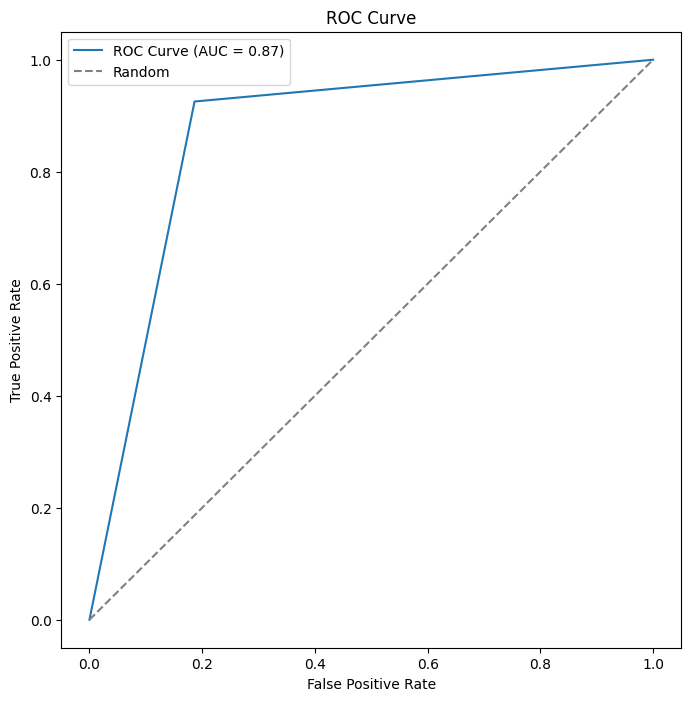

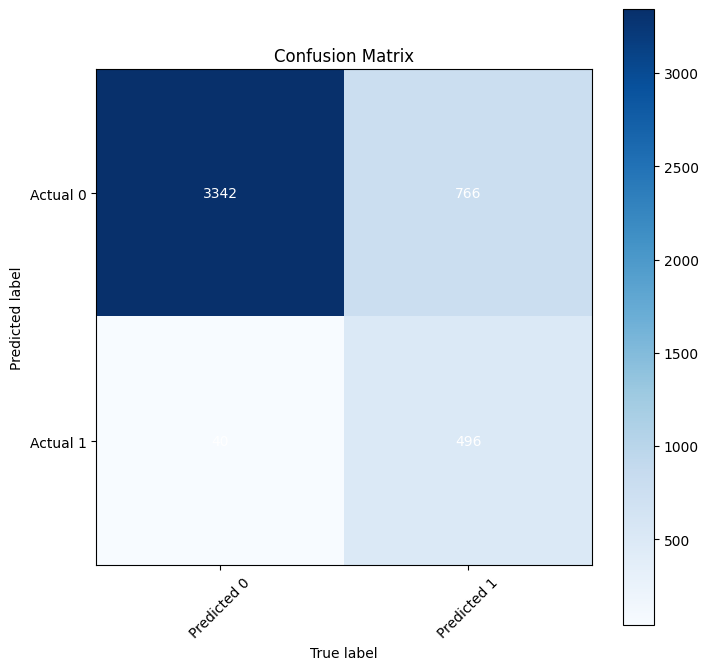

In [64]:

# Classification Report
classification_rep = classification_report(y_val_np, y_val_pred)
print("Classification Report:\n", classification_rep)

# ROC AUC Score
roc_auc = roc_auc_score(y_val_np, y_val_pred)
print("\nROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_np, y_val_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val_np, y_val_pred)
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'], rotation=45)
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()


In [ ]:
##Test set inference

In [32]:
# Standardize the features for the test set
X_test_scaled = scaler.transform(X_test_np) 

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test_scaled)

In [33]:
# Classification Report
classification_rep_test = classification_report(y_test_np, y_test_pred)
print("Test Set - Classification Report:\n", classification_rep_test)

# ROC AUC Score
roc_auc_test = roc_auc_score(y_test_np, y_test_pred)
print("\nTest Set - ROC AUC Score:", roc_auc_test)

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test_np, y_test_pred)
print("\nTest Set - Confusion Matrix:\n", conf_matrix_test)

Test Set - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      3538
           1       0.45      0.94      0.61       459

    accuracy                           0.86      3997
   macro avg       0.72      0.90      0.76      3997
weighted avg       0.93      0.86      0.88      3997


Test Set - ROC AUC Score: 0.8952631928972833

Test Set - Confusion Matrix:
 [[3005  533]
 [  27  432]]


In [37]:
y_pred = y_test_pred.tolist()

In [38]:
final_df = pd.DataFrame(
    {'article': X_test_articles,
    'index': X_test_ids,
     'score': y_pred
    }).set_index('index', drop=True)

final_df.head()

,article,score
index,,
450f021f46f61a71603748dacc073269052466d3 - 0,450f021f46f61a71603748dacc073269052466d3,1
450f021f46f61a71603748dacc073269052466d3 - 1,450f021f46f61a71603748dacc073269052466d3,1
450f021f46f61a71603748dacc073269052466d3 - 2,450f021f46f61a71603748dacc073269052466d3,1
450f021f46f61a71603748dacc073269052466d3 - 3,450f021f46f61a71603748dacc073269052466d3,1
450f021f46f61a71603748dacc073269052466d3 - 4,450f021f46f61a71603748dacc073269052466d3,0


In [39]:
output_df = final_df.sort_values(['article','score'], ascending=[1,0]).groupby('article').head(3)
output_df.head()

,article,score
index,,
00d9b61729e98d25a7f66e39153d749498530407 - 3,00d9b61729e98d25a7f66e39153d749498530407,1
00d9b61729e98d25a7f66e39153d749498530407 - 28,00d9b61729e98d25a7f66e39153d749498530407,1
00d9b61729e98d25a7f66e39153d749498530407 - 67,00d9b61729e98d25a7f66e39153d749498530407,1
07bd9b385482709912c01a77e5f7a8d86e4839c2 - 0,07bd9b385482709912c01a77e5f7a8d86e4839c2,1
07bd9b385482709912c01a77e5f7a8d86e4839c2 - 2,07bd9b385482709912c01a77e5f7a8d86e4839c2,1


In [40]:
selected_sentences = output_df.index.values
selected_sentences = selected_sentences.tolist()


['00d9b61729e98d25a7f66e39153d749498530407 - 3', '00d9b61729e98d25a7f66e39153d749498530407 - 28', '00d9b61729e98d25a7f66e39153d749498530407 - 67', '07bd9b385482709912c01a77e5f7a8d86e4839c2 - 0', '07bd9b385482709912c01a77e5f7a8d86e4839c2 - 2', '07bd9b385482709912c01a77e5f7a8d86e4839c2 - 3', '07f3d8c1dca494ea281f2ec843ec730218db3023 - 2', '07f3d8c1dca494ea281f2ec843ec730218db3023 - 3', '07f3d8c1dca494ea281f2ec843ec730218db3023 - 4', '0e9fb033391cd0058b715c1fb67153805aa32d3a - 0', '0e9fb033391cd0058b715c1fb67153805aa32d3a - 1', '0e9fb033391cd0058b715c1fb67153805aa32d3a - 2', '1165c4e11a63658d0d9534acf15f2b883aa805be - 0', '1165c4e11a63658d0d9534acf15f2b883aa805be - 2', '1165c4e11a63658d0d9534acf15f2b883aa805be - 3', '128f4086ad6910af13a30db04380b6220f7836f3 - 0', '128f4086ad6910af13a30db04380b6220f7836f3 - 1', '128f4086ad6910af13a30db04380b6220f7836f3 - 2', '1424ca6c7412e862f43d3d6433f3560499bcf044 - 3', '1424ca6c7412e862f43d3d6433f3560499bcf044 - 6', '1424ca6c7412e862f43d3d6433f3560499bc

In [41]:
y_pred = [1 if x in selected_sentences else 0 for x in X_test_ids]

y_pred_df = pd.DataFrame(
    {'y_pred': y_pred,
    })

print(y_pred_df.head(20))

    y_pred
0        1
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0


In [42]:
y_pred_df.to_csv('downsampled_predictions.csv', index=False)

In [43]:
from rouge_score import rouge_scorer

In [44]:
final_test_df = pd.read_csv("summary_generation.csv")
preds = pd.read_csv('downsampled_predictions.csv')
# Concatenate the DataFrames along columns
combi = pd.concat([final_test_df, preds], axis=1)

In [45]:
# Convert the string representation of a list into a single, nomral string where the words are joined by spaces.
import ast

combi['sentences'] = combi['sentences'].apply(lambda x: ' '.join(ast.literal_eval(x)))
print(combi['sentences'].apply(type))

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
396067    <class 'str'>
396068    <class 'str'>
396069    <class 'str'>
396070    <class 'str'>
396071    <class 'str'>
Name: sentences, Length: 396072, dtype: object


In [46]:
# Convert into normal strings.
combi['high_tokenized'] = combi['high_tokenized'].apply(lambda x: ' '.join([' '.join(sentence) for sentence in ast.literal_eval(x)]))

In [47]:
# Remove \r\n.
combi['high_tokenized'] = combi['high_tokenized'].apply(lambda x: x.replace(' \r\n ', ' '))

In [48]:
import re

# Replace a period followed by two or more spaces, with a period followed by one space.
def clean_extra_spaces_after_period(text):
    return re.sub(r'\. +', '. ', text)

combi['high_tokenized'] = combi['high_tokenized'].apply(clean_extra_spaces_after_period)

In [49]:
# Extract unique 'id' values in the order they appear.
unique_ids = combi['id'].unique()

all_summaries = []

for article_id in unique_ids:
    # Filter for the specific 'id'.
    group = combi[combi['id'] == article_id]
    extracted_sentences = group.loc[group['y_pred'] == 1, 'sentences'].tolist()

    # Join all sentences into a single summary paragraph.
    summary_paragraph = ' '.join(extracted_sentences)

    # Append the summary with the article ID.
    formatted_summary = f'({article_id}) {summary_paragraph}'
    all_summaries.append(formatted_summary)


with open('ml_summaries_final.txt', 'w', encoding='utf-8') as file:
    for summary in all_summaries:
        file.write(summary + '\n')

In [50]:
unique_ids = combi['id'].unique()

all_highlights = []

for article_id in unique_ids:
    group = combi[combi['id'] == article_id]
    # Select only the highlight from the first row of each group.
    first_row_highlight = group.iloc[0]['high_tokenized']
    formatted_highlight = f'({article_id}) {first_row_highlight}'
    all_highlights.append(formatted_highlight)

with open('ml_highlights_final.txt', 'w', encoding='utf-8') as file:
    for highlight in all_highlights:
        file.write(highlight + '\n')

In [51]:
from rouge_score import rouge_scorer
import pandas as pd

def calculate_rouge_scores(highlight, summary, scorer):
    scores = scorer.score(highlight, summary)
    return {'precision': round(scores['rouge2'].precision, 3),
            'recall': round(scores['rouge2'].recall, 3),
            'fmeasure': round(scores['rouge2'].fmeasure, 3)}

# Extract text after article ID.
def extract_text_after_id(text):
    return text.split(') ', 1)[1] if ') ' in text else text

with open('ml_summaries_final.txt', 'r', encoding='utf-8') as file:
    predicted_summaries = file.readlines()

with open('ml_highlights_final.txt', 'r', encoding='utf-8') as file:
    golden_summaries = file.readlines()

article_data = []

scorer = rouge_scorer.RougeScorer(['rouge2'], use_stemmer=False)

for pred_summary, gold_summary in zip(predicted_summaries, golden_summaries):
    pred_text = extract_text_after_id(pred_summary.strip())
    gold_text = extract_text_after_id(gold_summary.strip())

    rouge_scores = calculate_rouge_scores(gold_text, pred_text, scorer)

    article_data.append(rouge_scores)

result_df = pd.DataFrame(article_data)

print(result_df)

       precision  recall  fmeasure
0          0.114   0.273     0.161
1          0.011   0.024     0.015
2          0.000   0.000     0.000
3          0.000   0.000     0.000
4          0.103   0.146     0.121
...          ...     ...       ...
11485      0.000   0.000     0.000
11486      0.000   0.000     0.000
11487      0.000   0.000     0.000
11488      0.000   0.000     0.000
11489      0.000   0.000     0.000

[11490 rows x 3 columns]


In [52]:
# Calculate mean and std for precision, recall, and f-measure
mean_precision = round(result_df['precision'].mean(), 3)
std_precision = round(result_df['precision'].std(), 3)

mean_recall = round(result_df['recall'].mean(), 3)
std_recall = round(result_df['recall'].std(), 3)

mean_fmeasure = round(result_df['fmeasure'].mean(), 3)
std_fmeasure = round(result_df['fmeasure'].std(), 3)

# Print the results
print(f"Mean Precision: {mean_precision}, Std Precision: {std_precision}")
print(f"Mean Recall: {mean_recall}, Std Recall: {std_recall}")
print(f"Mean F-Measure: {mean_fmeasure}, Std F-Measure: {std_fmeasure}")

Mean Precision: 0.0, Std Precision: 0.007
Mean Recall: 0.001, Std Recall: 0.013
Mean F-Measure: 0.0, Std F-Measure: 0.008
